# Introduction
**In this notebook you will find EDA and Multiple LInear Regression Analysis of House Prices for beginners in a very simple and clear manner**

# Overview

**This is an exploratory data analysis on the House Prices Kaggle Competition found at**

**https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

** Feel free to provide suggestion and comment on the script. Your valuable suggestion are always welcome **

# A very simple tutorial for beginners to start data exploration and data modelling
- Explore the data
- EDA
- Data Modeling
- Data Validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Libraries 

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error


# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Head train data
train.shape

In [ ]:
# Head train data
test.shape

In [ ]:
# Get all the numeric variables
numeric_features= train.select_dtypes(include= [np.number])
numeric_features.head()

In [ ]:
# Get all categorical variables
categorical_features= train.select_dtypes(include= [object])
categorical_features.head()

In [ ]:
# Skewness plot
sns.distplot(train.skew(), color="blue", axlabel= "Skewness")

In [ ]:
# Kurtosis plot
plt.figure(figsize=(12,8))
sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",
            norm_hist= False, kde=True, rug= False)

plt.show()

In [ ]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution", fontsize=15)
plt.hist(train["SalePrice"], color= "blue")
plt.show()

In [ ]:
# Log normal histogram of target variable
target= np.log(train["SalePrice"])
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Log Normal Sale Price Frequency Distribution", fontsize=15)
plt.hist(target, color= "blue")
plt.show()

In [ ]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallQual", data= train)
plt.title("Overall Quality vs SalePrice", fontsize=15)
plt.xlabel("Overall Quality", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

In [ ]:
# Get correlation of numeric variables
correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

In [ ]:
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Featuer with Sale Price", y=1, size=16)
sns.heatmap(correlation, square= True, vmax=0.8)

In [ ]:
# Zoomed Heat Map
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)



In [ ]:
# We can see the multicollinearity between GarageCars and GarageArea, TotalBsmtSF and 1stflrSF, TotRmsAbvGrd and GrLivArea

train["GarageCars"].corr(train["SalePrice"]), train["GarageArea"].corr(train["SalePrice"])

In [ ]:
train["TotalBsmtSF"].corr(train["SalePrice"]), train["1stFlrSF"].corr(train["SalePrice"])

In [ ]:
train["TotRmsAbvGrd"].corr(train["SalePrice"]), train["GrLivArea"].corr(train["SalePrice"])

In [ ]:
# Drop correlated variables
train.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)
test.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)

In [ ]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= train.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [ ]:
# Get total and percent missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
# Delete missing values variables from the dataset

train.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)
test.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)

# correlation= numeric_features.corr()
# correlation["SalePrice"].sort_values(ascending=False)*100

In [ ]:
# Check the shape of train and test data
train.shape, test.shape

In [ ]:
# Delet numeric features which are not correlated from the train data
train.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [ ]:
# Delet numeric features which are not correlated from the test data
test.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [ ]:
# Check shape of train and test
train.shape, test.shape

In [ ]:
# Head of categorical features
categorical_features.head()

In [ ]:
# Get the remaining numeric variables
numeric_features= train.select_dtypes(include= [np.number])
numeric_features.head()

In [ ]:
# Get the correlation
correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

In [ ]:
# Pairplot of numeric variables
# Pairplot of numeric variable
sns.set(style="ticks", color_codes=True)
columns= ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath", 
         "YearBuilt", "YearRemodAdd"]
sns.pairplot(train[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

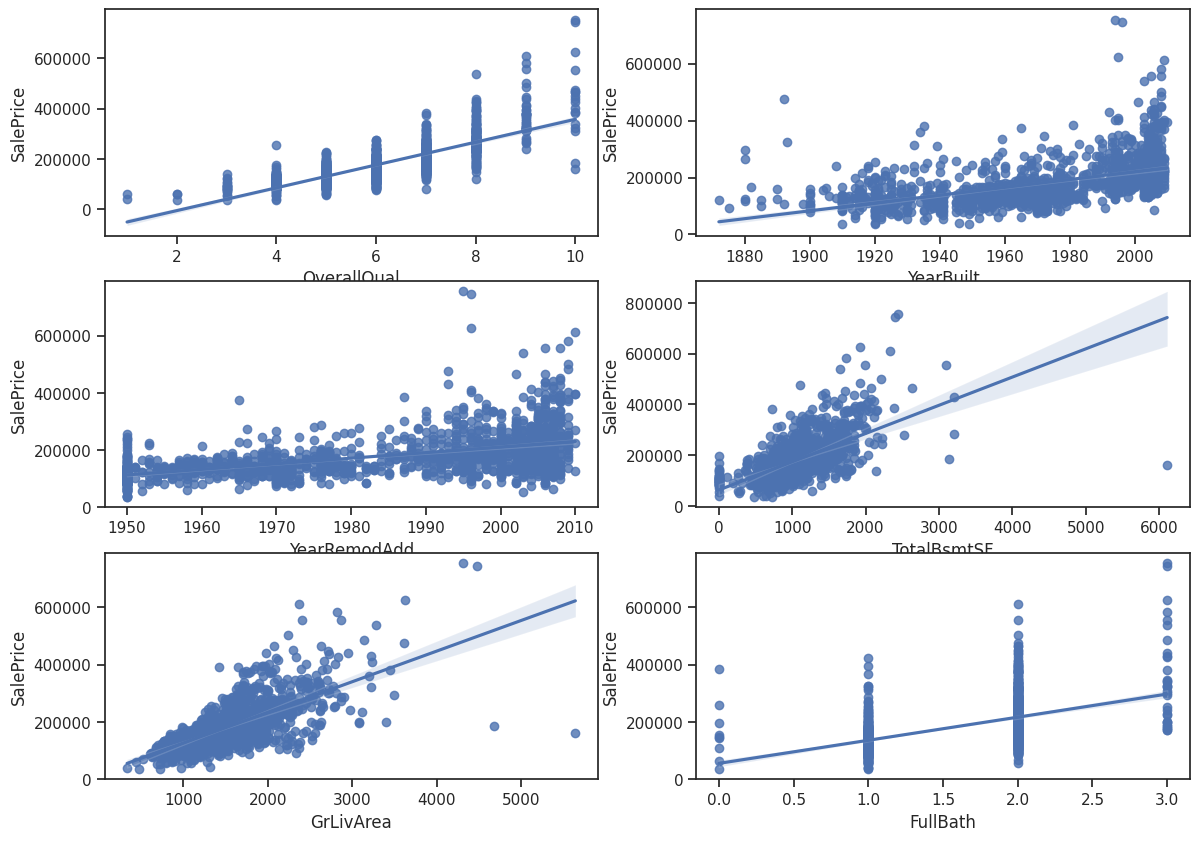

In [ ]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,10))

sns.regplot(x=train["OverallQual"], y=train["SalePrice"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=train["YearBuilt"], y=train["SalePrice"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=train["YearRemodAdd"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=train["GrLivArea"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=train["FullBath"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax6)

# sns.regplot(x=train["GarageCars"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax7)

plt.show()

# sns.regplot(x=train["OverallQual"], y=train["SalePrice"], fit_reg=False)


In [ ]:
# Check missing values in categorical variable
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
GarageFinish,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageType,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrType,8,0.547945


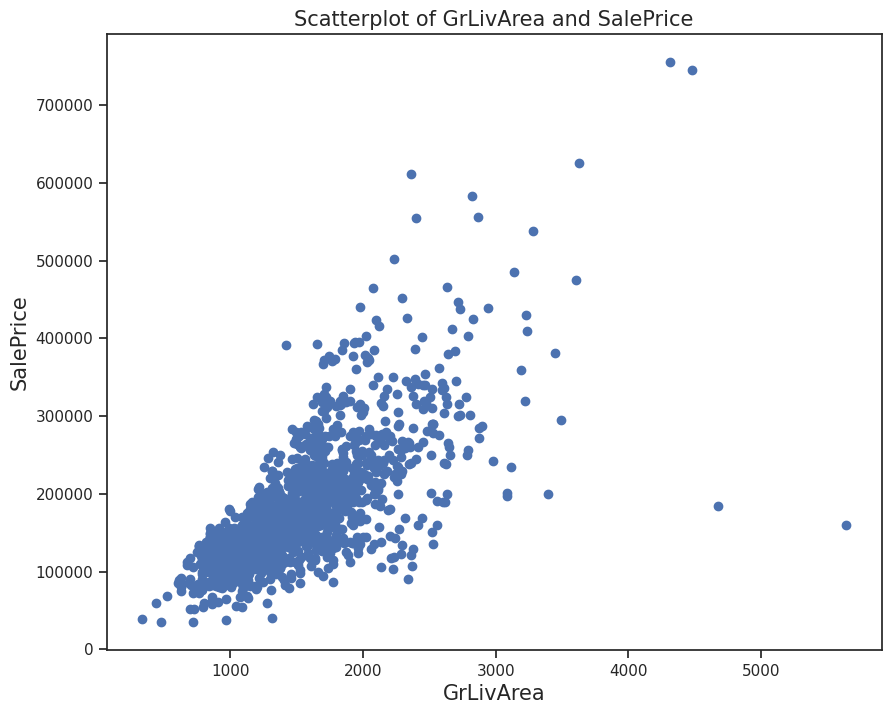

In [ ]:
# Outlier detection
plt.figure(figsize=(10,8))
plt.title("Scatterplot of GrLivArea and SalePrice", fontsize=15)
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)
plt.scatter(x= train.GrLivArea, y= train.SalePrice)

# Remove outlier
train.drop(train[(train['GrLivArea'] >4000) & (train['SalePrice']<300000)].index,inplace = True)

In [ ]:
for col in categorical_features.columns.tolist():
    if categorical_features[col].dtype == 'object':
        sns.countplot(x=col, data=categorical_features)
        plt.xticks(rotation=55)
        plt.show

In [ ]:
for col in categorical_features.columns.tolist():
    if categorical_features[col].dtype == 'object':
        sns.countplot(x=col, data=categorical_features)
        plt.xticks(rotation=55)
        plt.show()

In [ ]:
# Again check the missing values in remaining variables
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

In [ ]:
# Since the feature has most SBrkr we will consider this
train["Electrical"].isnull().sum()
train["Electrical"].value_counts()
train["Electrical"]= train["Electrical"].fillna(train["Electrical"].mode()[0])
test["Electrical"]= test["Electrical"].fillna(test["Electrical"].mode()[0])

In [ ]:
# MasVnrType: We will consider mode i.e we will fill None
train["MasVnrType"].isnull().sum()
train["MasVnrType"].value_counts()
train["MasVnrType"]= train["MasVnrType"].fillna(train["MasVnrType"].fillna("None"))
test["MasVnrType"]= test["MasVnrType"].fillna(test["MasVnrType"].fillna("None"))

In [ ]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, 
# NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col]= train[col].fillna("None")


for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col]= test[col].fillna("None")

In [ ]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col]= train[col].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col]= test[col].fillna("None")


In [ ]:
# MSZoning: Fill mode (RL)
test["MSZoning"].value_counts()
test["MSZoning"].isnull().sum()
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [ ]:
# Functional : data description says NA means typical
test["Functional"].value_counts()
test["Functional"].isnull().sum()
test["Functional"]= test["Functional"].fillna(test["Functional"].fillna("Typ"))

In [ ]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
# Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.
# We can then safely remove it.

train= train.drop(["Utilities"], axis=1)
test= test.drop(["Utilities"], axis=1)

In [ ]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value.
# We will just substitute in the most common string

test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

In [ ]:
# SaleType : Fill in again with most frequent which is "WD"

test["SaleType"]= test["SaleType"].fillna(test["SaleType"].mode()[0])

In [ ]:
# GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage
test["GarageCars"]= test["GarageCars"].fillna(test["GarageCars"].fillna(0))

In [ ]:
# TotalBsmtSF: missing values are likely zero for having no basement
test["TotalBsmtSF"]= test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].fillna(0))

In [ ]:
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the 
# missing value in KitchenQual.
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [ ]:
# Check shape of the data after remvoing variables
train.shape, test.shape

In [ ]:
t= train.select_dtypes(include=[np.object]).columns
t

In [ ]:
# Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
# cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSZoning', 'LandContour', 'LotConfig',
#         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', )


cols= ('Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSZoning')
# Process columns, apply LabelEncoder to categories features
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]= lbl.transform(list(train[c].values))
    
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c]= lbl.transform(list(test[c].values))

# Shape
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

In [ ]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100
# correlation_one["SalePrice"].sort_values(ascending=False)*100

In [ ]:
# Drop uncorrelated variables
train.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

test.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

In [ ]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100

# SalePrice   : What is the price of a house
# OverallQual : Overall material and finish quality
# GrLivArea   : Above grade Ground living area square feet
# TotalBsmtSF : Total Square feet of basement area
# GarageCars  : Size of garage in car capacity
# FullBath    : Full bathroom above grade
# YearBuilt   : Original Construction date
# YearRemodAdd: Remodel date
# KitchenQual : Kitchen Quality
# BsmtQual    : Height of the basement
# ExterQual   : Exterior material Quality

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Reshape the data
train.shape, test.shape
test.drop(test.index[1458], inplace=True)
train.shape, test.shape

In [ ]:
# Prepare data for modeling
X= train.drop("SalePrice", axis=1)
y= train.SalePrice

# Split the data and check the shape of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Instantiate the model
linreg= LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Make predictions
pred_test = linreg.predict(X_test)

In [ ]:
# Get the coefficient and intercept of the model
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# Pair the feature name with the coefficient
list(zip(train, linreg.coef_))

In [ ]:
# Print R square
print("R Square ", linreg.score(X_test, y_test))
# So, in our model, 81.51% of the variability in Y can be explained using X.

In [ ]:
# Mean Absolute Deviation
print("MAE:", metrics.mean_absolute_error(pred_test, y_test))

In [ ]:
# Mean Square Error
print("MSE:", metrics.mean_squared_error(pred_test, y_test))

In [ ]:
# Root Mean square Error
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred_test, y_test)))
# Our model was able to predict the value of every house in the test set within $30430 of the real price.